# Using Artificial Neural Network to Predict the Prices of Diamond

### Importing the libraries

In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [87]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [88]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [89]:
# Read in the diamond dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv")

In [90]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [91]:
#view the first five rows of your dataset
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [92]:
# viewing 10 samples from the dataset
dataset.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
26254,2.00,Good,I,VS1,58.8,65.0,15708,8.03,8.10,4.74
12364,0.26,Very Good,D,VVS2,60.4,59.0,597,4.15,4.19,2.52
2288,0.90,Ideal,J,VS2,61.3,57.0,3160,6.16,6.24,3.80
21656,1.22,Ideal,F,VS1,61.5,56.0,9756,6.89,6.84,4.22
10243,0.94,Premium,F,SI1,59.8,61.0,4748,6.39,6.35,3.81
13948,1.21,Premium,J,VVS2,60.8,60.0,5674,6.88,6.86,4.18
7128,0.90,Good,E,SI1,60.7,63.0,4173,6.07,6.13,3.70
52350,0.75,Very Good,F,SI1,62.1,57.0,2500,5.82,5.88,3.63
38431,0.38,Ideal,F,VS2,62.8,57.0,1026,4.62,4.58,2.89
21797,1.02,Ideal,F,VVS2,60.9,56.0,9870,6.54,6.49,3.97


In [93]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [94]:
#summing all the nulls in each columns
dataset.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [95]:
#seeing the uniques count of each columns
dataset.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [96]:
dataset.shape

(53940, 10)

In [97]:
dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

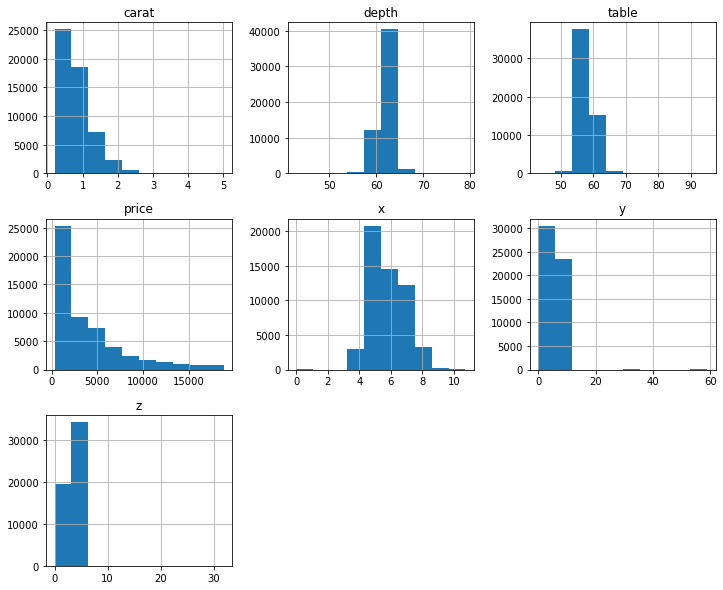

In [98]:
dataset.hist(figsize = (12,10))
plt.show()

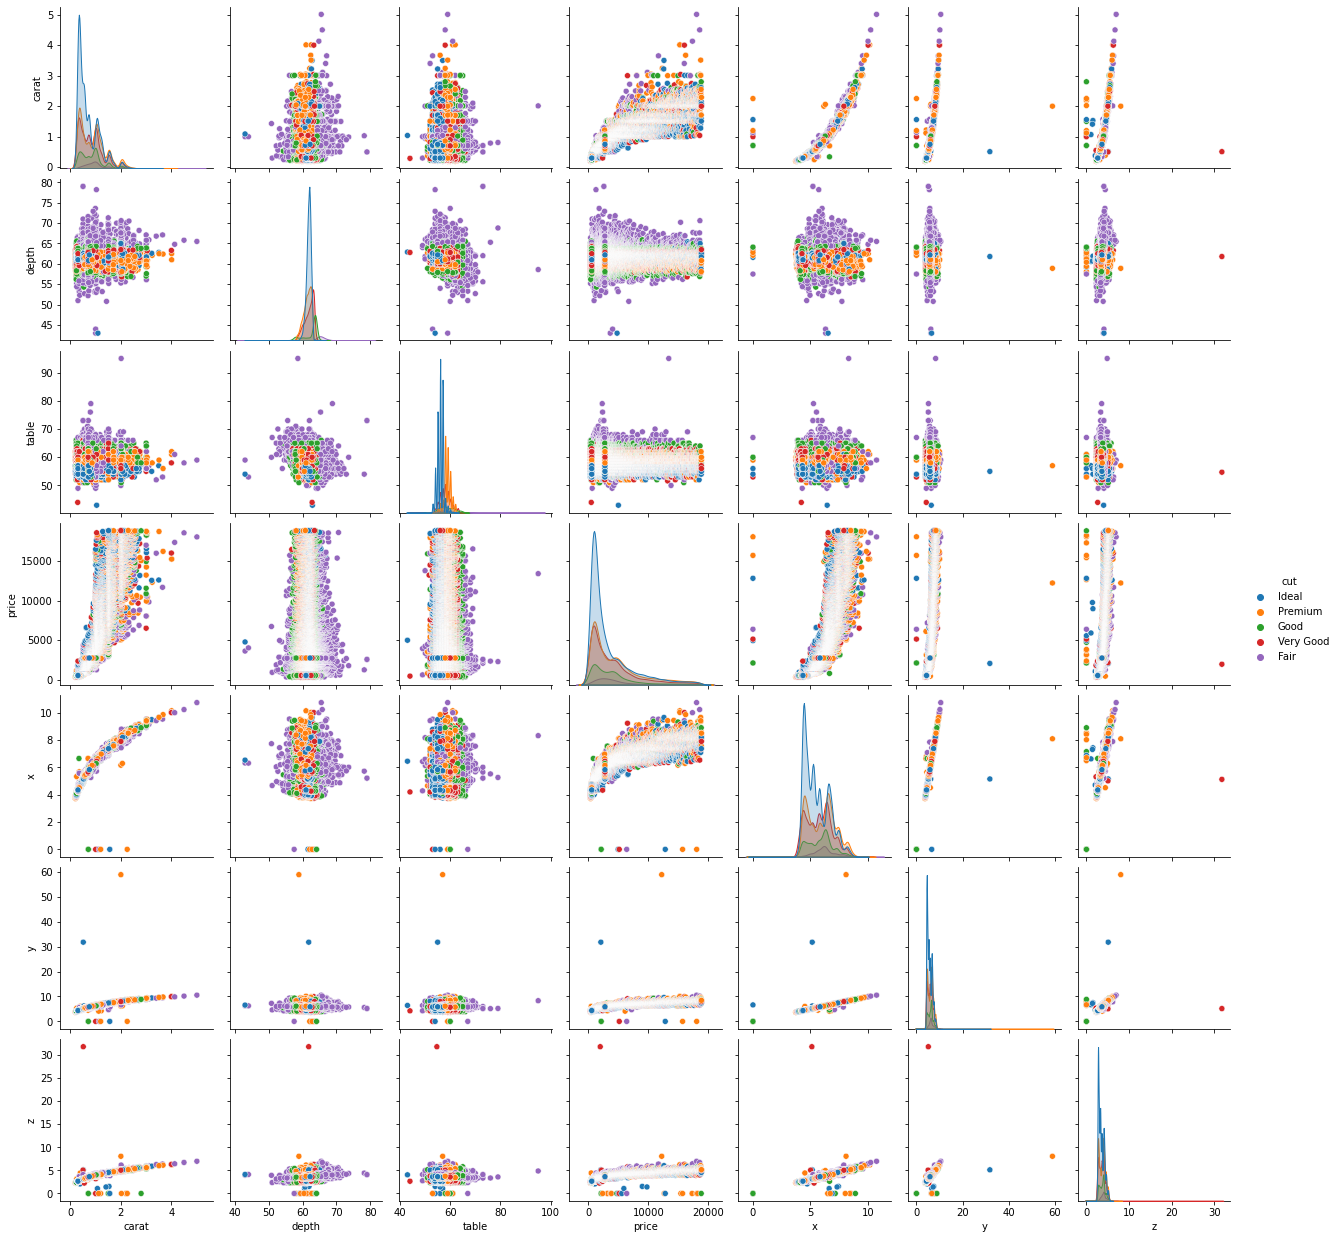

In [20]:
ax=sns.pairplot(dataset, hue= "cut")

<AxesSubplot:>

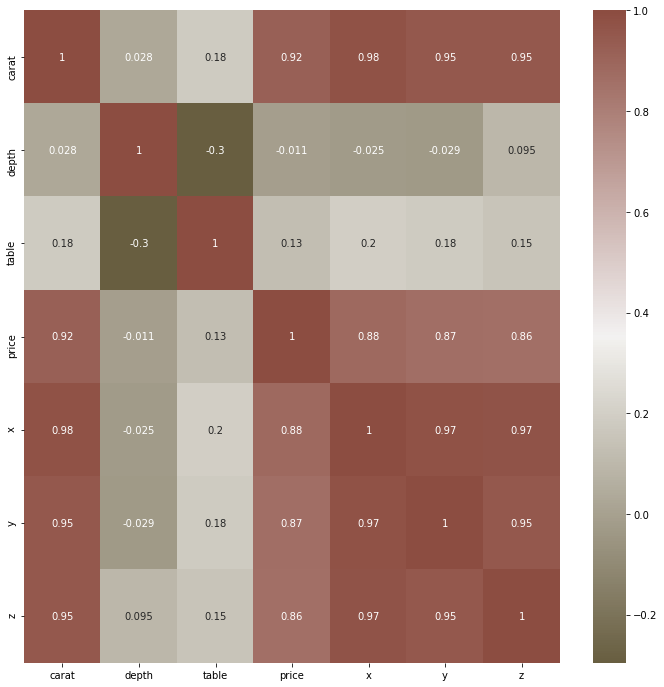

In [21]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= dataset.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

Points to notice:

"x", "y" and "z" show a high correlation to the target column.
"depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.

In [99]:
X = dataset.iloc[:,  [0,1,2,3,4,5,7,8,9]].values
y = dataset.iloc[:, -4].values

In [100]:
print(X)

[[0.23 'Ideal' 'E' ... 3.95 3.98 2.43]
 [0.21 'Premium' 'E' ... 3.89 3.84 2.31]
 [0.23 'Good' 'E' ... 4.05 4.07 2.31]
 ...
 [0.7 'Very Good' 'D' ... 5.66 5.68 3.56]
 [0.86 'Premium' 'H' ... 6.15 6.12 3.74]
 [0.75 'Ideal' 'D' ... 5.83 5.87 3.64]]


In [101]:
X.shape

(53940, 9)

In [102]:
print(y)

[ 326  326  327 ... 2757 2757 2757]


In [103]:
y.shape

(53940,)

In [104]:
#Encoding Categorical Data since theres a link relationship between them
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#y = le.fit_transform(y)
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[:,3] = le.fit_transform(X[:,3])

In [105]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1,2,3])],remainder = 'passthrough')
# X = np.array(ct.fit_transform(X))

In [106]:
print(X)

[[0.23 2 1 ... 3.95 3.98 2.43]
 [0.21 3 1 ... 3.89 3.84 2.31]
 [0.23 1 1 ... 4.05 4.07 2.31]
 ...
 [0.7 4 0 ... 5.66 5.68 3.56]
 [0.86 3 4 ... 6.15 6.12 3.74]
 [0.75 2 0 ... 5.83 5.87 3.64]]


### Splitting the dataset into the Training set - Validation - Test set

### Train-Validation-Test Split
In the following, I will randomly assign 70% of the data to the training part and 15% each to the validation and test part.

In [107]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# Generate TrainX and TrainY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - train_ratio)

# Genearate ValX, TestX, ValY and TestY
valX, X_test, valY,y_test = train_test_split(X_test,y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [110]:
print(X_train.shape)
print(valX.shape)
print( X_test.shape)

(37757, 9)
(8091, 9)
(8092, 9)


In [111]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [112]:
# len(X_train), len(X_test)

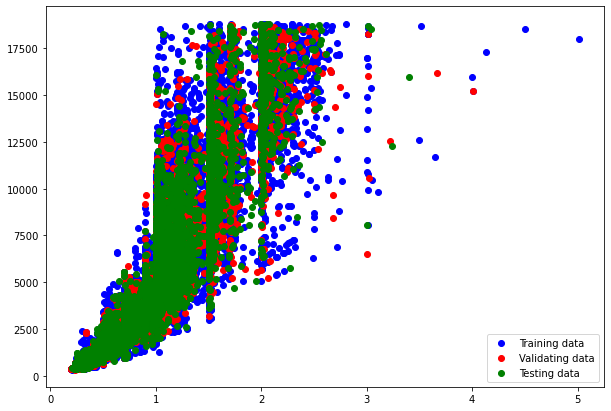

In [34]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train[:,0], y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(valX[:,0], valY, c='r', label='Validating data')
# Plot test data in green
plt.scatter(X_test[:,0], y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

### Standard Scaler

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
valX = sc.transform(valX)

# sc=StandardScaler()

# scaler = sc.fit(trainX)

# trainX_scaled = scaler.transform(trainX)
# valX_scaled = scaler.transform(valX)
# testX_scaled = scaler.transform(testX)

In [114]:
print(X_train), print(X_test), print(valX)

[[-0.8194383  -0.54076583 -1.52703016 ... -0.84792435 -0.87108883
  -0.84388823]
 [ 3.13612553  0.43294276  1.41670913 ...  2.40932179  2.36437468
   2.34244824]
 [ 0.53433756  1.40665135 -0.34953444 ...  0.66914919  0.68158669
   0.69288467]
 ...
 [-0.96750753 -0.54076583 -1.52703016 ... -1.09779528 -1.09661712
  -1.09766724]
 [ 0.23819909 -0.54076583 -0.34953444 ...  0.39250637  0.35196842
   0.41090799]
 [-0.16370312 -1.51447442 -0.34953444 ... -0.04476777 -0.09041399
   0.10073364]]
[[-0.14255037 -1.51447442 -0.9382823  ... -0.02691984 -0.0123465
   0.12893131]
 [ 1.84580792 -0.54076583  1.41670913 ...  1.63293709  1.60972233
   1.62340771]
 [ 0.47087931  0.43294276  0.23921341 ...  0.73161693  0.65556419
   0.6223905 ]
 ...
 [-0.98866028 -0.54076583 -1.52703016 ... -1.13349113 -1.08794295
  -1.15406258]
 [ 0.68240679  0.43294276  0.82796127 ...  0.88332428  0.76832834
   0.80567534]
 [-0.14255037  0.43294276  1.41670913 ...  0.0801677   0.09174347
   0.04433831]]
[[-0.96750753  1.

(None, None, None)

In [38]:
X_train.shape

(37757, 9)

In [39]:
X_test.shape

(8092, 9)

In [40]:
valX.shape

(8091, 9)

## Part 2 - Building the ANN

## Model 1

In [41]:
tf.random.set_seed(12)  #first we set random seed
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1)
])
model_1.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])


In [50]:
history = model_1.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 30)

Epoch 1/30
1180/1180 [==============================] - 1s 473us/step - loss: 768.7773 - mae: 768.7773 - val_loss: 784.1522 - val_mae: 784.1522
Epoch 2/30
1180/1180 [==============================] - 1s 449us/step - loss: 768.7985 - mae: 768.7985 - val_loss: 784.8397 - val_mae: 784.8397
Epoch 3/30
1180/1180 [==============================] - 1s 428us/step - loss: 768.6578 - mae: 768.6578 - val_loss: 783.0919 - val_mae: 783.0919
Epoch 4/30
1180/1180 [==============================] - 1s 424us/step - loss: 768.8333 - mae: 768.8333 - val_loss: 784.0221 - val_mae: 784.0221
Epoch 5/30
1180/1180 [==============================] - 0s 408us/step - loss: 768.8458 - mae: 768.8458 - val_loss: 783.5426 - val_mae: 783.5426
Epoch 6/30
1180/1180 [==============================] - 0s 420us/step - loss: 768.6424 - mae: 768.6424 - val_loss: 800.5095 - val_mae: 800.5095
Epoch 7/30
1180/1180 [==============================] - 1s 435us/step - loss: 768.6948 - mae: 768.6948 - val_loss: 787.7115 - val_mae: 7

In [ ]:
# history = model.fit(trainX_scaled,
#                     trainY,
#                     steps_per_epoch=n_steps_per_epoch,
#                     epochs=n_epochs,
#                     batch_size=n_batch_size,
#                     validation_data=(valX_scaled, valY),
#                     validation_steps=n_validation_steps,
#                     callbacks=[keras_callbacks])


In [44]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 50        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Evaluate our larger model
model_1.evaluate(X_test, y_test)

253/253 [==============================] - 0s 344us/step - loss: 766.1152 - mae: 766.1152


[766.1151733398438, 766.1151733398438]

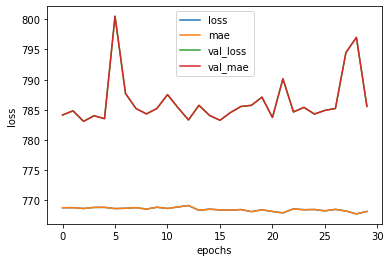

In [51]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### Validation

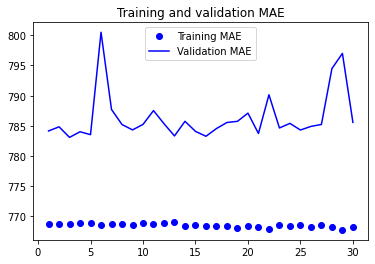

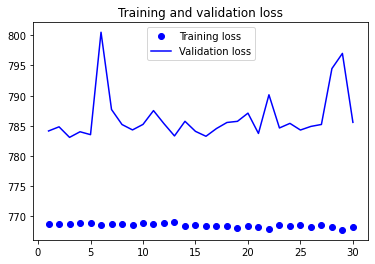

In [52]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 2

 Increasing the hidden layer and the number of epoch but still maintaining the optimizer as Stochastic gradient descent

In [116]:
tf.random.set_seed(12)  #first we set random seed
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1)
])
model_2.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
history = model_2.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 30)

Epoch 1/30
1180/1180 [==============================] - 1s 873us/step - loss: 1285.9479 - mae: 1285.9479 - val_loss: 922.9417 - val_mae: 922.9417
Epoch 2/30
1180/1180 [==============================] - 2s 1ms/step - loss: 929.9989 - mae: 929.9989 - val_loss: 829.8075 - val_mae: 829.8075
Epoch 3/30
1180/1180 [==============================] - 1s 1ms/step - loss: 919.1573 - mae: 919.1573 - val_loss: 943.1582 - val_mae: 943.1582
Epoch 4/30
1180/1180 [==============================] - 1s 1ms/step - loss: 921.9958 - mae: 921.9958 - val_loss: 1102.4305 - val_mae: 1102.4305
Epoch 5/30
1180/1180 [==============================] - 1s 904us/step - loss: 921.2109 - mae: 921.2109 - val_loss: 1387.7133 - val_mae: 1387.7133
Epoch 6/30
1180/1180 [==============================] - 1s 894us/step - loss: 924.0429 - mae: 924.0429 - val_loss: 1340.1528 - val_mae: 1340.1528
Epoch 7/30
1180/1180 [==============================] - 1s 835us/step - loss: 915.0646 - mae: 915.0646 - val_loss: 800.0341 - val_mae:

#####  result; There's still no much different in the mean absolute error compared to the result of the first model.

### validation

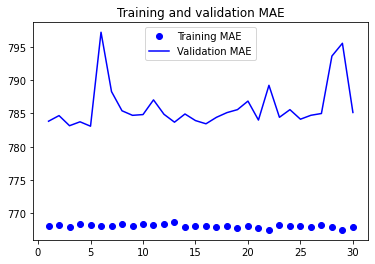

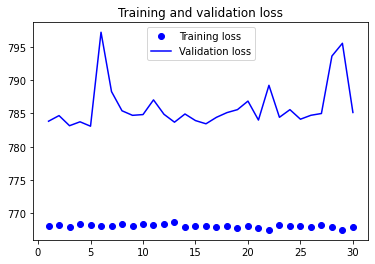

In [54]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 3

This time we'll add an extra dense layer (so now our model will have 2 hidden layers and increasing the dense units) also using a different optimizer called RMSprop

In [56]:
# Set random seed
tf.random.set_seed(12)

# Replicate model_1 and add an extra layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
     tf.keras.layers.Dense(3),
  tf.keras.layers.Dense(1)# add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(), ##stochastic GD
                metrics=['mae'])
                     

In [57]:

# Fit the model
history = model_3.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 100)

Epoch 1/100
1180/1180 [==============================] - 1s 1ms/step - loss: 3871.5894 - mae: 3871.5894 - val_loss: 3820.1030 - val_mae: 3820.1030
Epoch 2/100
1180/1180 [==============================] - 1s 1ms/step - loss: 3065.6243 - mae: 3065.6243 - val_loss: 1939.7179 - val_mae: 1939.7179
Epoch 3/100
1180/1180 [==============================] - 1s 1ms/step - loss: 1178.4351 - mae: 1178.4351 - val_loss: 1063.7952 - val_mae: 1063.7952
Epoch 4/100
1180/1180 [==============================] - 1s 957us/step - loss: 1017.3874 - mae: 1017.3874 - val_loss: 1008.8576 - val_mae: 1008.8576
Epoch 5/100
1180/1180 [==============================] - 1s 683us/step - loss: 960.9537 - mae: 960.9537 - val_loss: 952.8983 - val_mae: 952.8983
Epoch 6/100
1180/1180 [==============================] - 1s 688us/step - loss: 903.4514 - mae: 903.4514 - val_loss: 896.5127 - val_mae: 896.5127
Epoch 7/100
1180/1180 [==============================] - 1s 779us/step - loss: 849.8547 - mae: 849.8547 - val_loss: 848.

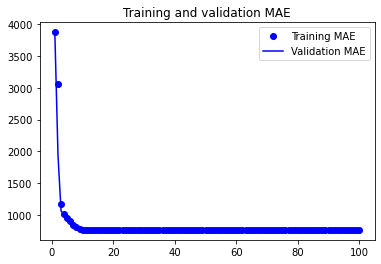

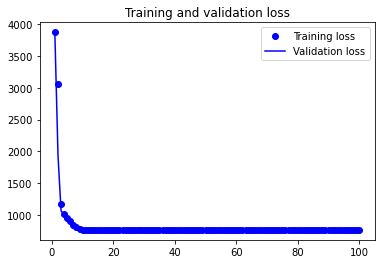

In [58]:


mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


## Model 4

In [73]:
# Set random seed
tf.random.set_seed(12)

# Replicate model_1 and add an extra layer
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
     tf.keras.layers.Dense(5,activation='relu'),
  tf.keras.layers.Dense(1)
])
# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), ##Adam optimizer
                metrics=['mae'])

### Training the ANN model on the Training set

In [74]:

# Fit the model
history = model_4.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 50)

Epoch 1/50
1180/1180 [==============================] - 2s 1ms/step - loss: 3538.4016 - mae: 3538.4016 - val_loss: 2549.8503 - val_mae: 2549.8503
Epoch 2/50
1180/1180 [==============================] - 1s 1ms/step - loss: 1165.0881 - mae: 1165.0881 - val_loss: 837.9851 - val_mae: 837.9851
Epoch 3/50
1180/1180 [==============================] - 1s 1ms/step - loss: 758.9539 - mae: 758.9539 - val_loss: 728.9073 - val_mae: 728.9073
Epoch 4/50
1180/1180 [==============================] - 1s 926us/step - loss: 702.8876 - mae: 702.8876 - val_loss: 703.9604 - val_mae: 703.9604
Epoch 5/50
1180/1180 [==============================] - 1s 705us/step - loss: 686.0852 - mae: 686.0852 - val_loss: 692.5430 - val_mae: 692.5430
Epoch 6/50
1180/1180 [==============================] - 1s 787us/step - loss: 676.0577 - mae: 676.0577 - val_loss: 685.0482 - val_mae: 685.0482
Epoch 7/50
1180/1180 [==============================] - 1s 881us/step - loss: 669.1686 - mae: 669.1686 - val_loss: 679.1626 - val_mae: 6

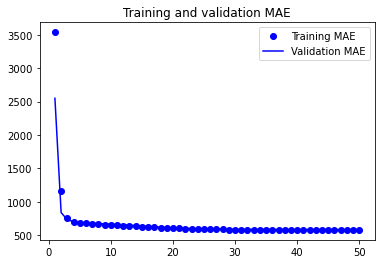

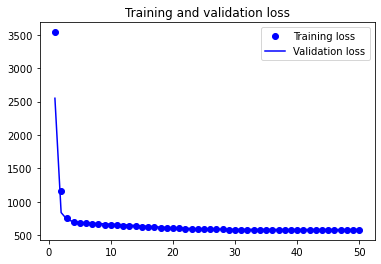

In [75]:
 mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [76]:
#model summary

model_4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 6         
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


## Model 5

In [77]:
# Set random seed
tf.random.set_seed(12)

# Replicate model_1 and add an extra layer
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1)
])
# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), ##Adam optimizer
                metrics=['mae'])

# Fit the model
history = model_5.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 100)

Epoch 1/100
1180/1180 [==============================] - 2s 1ms/step - loss: 2322.7781 - mae: 2322.7781 - val_loss: 790.2665 - val_mae: 790.2665
Epoch 2/100
1180/1180 [==============================] - 1s 1ms/step - loss: 729.2521 - mae: 729.2521 - val_loss: 718.7309 - val_mae: 718.7309
Epoch 3/100
1180/1180 [==============================] - 2s 1ms/step - loss: 696.9602 - mae: 696.9602 - val_loss: 700.3178 - val_mae: 700.3178
Epoch 4/100
1180/1180 [==============================] - 2s 1ms/step - loss: 681.7477 - mae: 681.7477 - val_loss: 687.4369 - val_mae: 687.4369
Epoch 5/100
1180/1180 [==============================] - 1s 1ms/step - loss: 669.3339 - mae: 669.3339 - val_loss: 675.6948 - val_mae: 675.6948
Epoch 6/100
1180/1180 [==============================] - 1s 1ms/step - loss: 657.0924 - mae: 657.0924 - val_loss: 662.4307 - val_mae: 662.4307
Epoch 7/100
1180/1180 [==============================] - 1s 1ms/step - loss: 646.2731 - mae: 646.2731 - val_loss: 651.8531 - val_mae: 651.85

Epoch 58/100
1180/1180 [==============================] - 2s 1ms/step - loss: 539.5849 - mae: 539.5849 - val_loss: 541.4517 - val_mae: 541.4517
Epoch 59/100
1180/1180 [==============================] - 2s 1ms/step - loss: 537.2839 - mae: 537.2839 - val_loss: 540.0702 - val_mae: 540.0702
Epoch 60/100
1180/1180 [==============================] - 2s 1ms/step - loss: 535.5203 - mae: 535.5203 - val_loss: 538.1802 - val_mae: 538.1802
Epoch 61/100
1180/1180 [==============================] - 2s 1ms/step - loss: 533.6681 - mae: 533.6681 - val_loss: 539.6706 - val_mae: 539.6706
Epoch 62/100
1180/1180 [==============================] - 1s 1ms/step - loss: 531.6575 - mae: 531.6575 - val_loss: 533.5536 - val_mae: 533.5536
Epoch 63/100
1180/1180 [==============================] - 2s 2ms/step - loss: 528.2162 - mae: 528.2162 - val_loss: 530.9661 - val_mae: 530.9661
Epoch 64/100
1180/1180 [==============================] - 1s 1ms/step - loss: 526.1931 - mae: 526.1931 - val_loss: 527.6080 - val_mae: 5

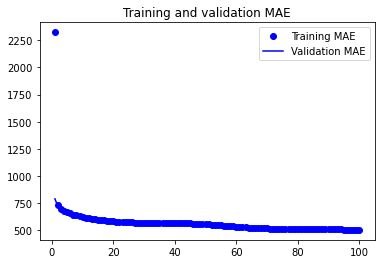

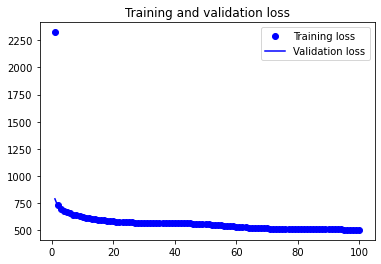

In [78]:
 mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 6

In [117]:
# Set random seed
tf.random.set_seed(12)

# Replicate model_1 and add an extra layer
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
     tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1)
])
# Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), ##Adam optimizer
                metrics=['mae'])

# Fit the model
history = model_6.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 100)

Epoch 1/100
1180/1180 [==============================] - 1s 1ms/step - loss: 1036.3851 - mae: 1036.3851 - val_loss: 673.9509 - val_mae: 673.9509
Epoch 2/100
1180/1180 [==============================] - 1s 935us/step - loss: 606.6384 - mae: 606.6384 - val_loss: 582.3676 - val_mae: 582.3676
Epoch 3/100
1180/1180 [==============================] - 1s 923us/step - loss: 554.0668 - mae: 554.0668 - val_loss: 551.4651 - val_mae: 551.4651
Epoch 4/100
1180/1180 [==============================] - 1s 920us/step - loss: 531.0020 - mae: 531.0020 - val_loss: 537.9741 - val_mae: 537.9741
Epoch 5/100
1180/1180 [==============================] - 1s 916us/step - loss: 521.2783 - mae: 521.2783 - val_loss: 526.7853 - val_mae: 526.7853
Epoch 6/100
1180/1180 [==============================] - 1s 869us/step - loss: 512.8591 - mae: 512.8591 - val_loss: 518.6732 - val_mae: 518.6732
Epoch 7/100
1180/1180 [==============================] - 1s 902us/step - loss: 506.2747 - mae: 506.2747 - val_loss: 517.5897 - val

Epoch 56/100
1180/1180 [==============================] - 1s 1ms/step - loss: 314.8947 - mae: 314.8947 - val_loss: 319.6113 - val_mae: 319.6113
Epoch 57/100
1180/1180 [==============================] - 1s 996us/step - loss: 311.8174 - mae: 311.8174 - val_loss: 323.8513 - val_mae: 323.8513
Epoch 58/100
1180/1180 [==============================] - 1s 1ms/step - loss: 311.7890 - mae: 311.7890 - val_loss: 324.5550 - val_mae: 324.5550
Epoch 59/100
1180/1180 [==============================] - 1s 982us/step - loss: 310.2608 - mae: 310.2608 - val_loss: 331.3888 - val_mae: 331.3888
Epoch 60/100
1180/1180 [==============================] - 1s 1ms/step - loss: 307.2760 - mae: 307.2760 - val_loss: 317.6071 - val_mae: 317.6071
Epoch 61/100
1180/1180 [==============================] - 1s 1ms/step - loss: 307.3792 - mae: 307.3792 - val_loss: 327.9519 - val_mae: 327.9519
Epoch 62/100
1180/1180 [==============================] - 1s 1ms/step - loss: 305.7443 - mae: 305.7443 - val_loss: 319.4257 - val_ma

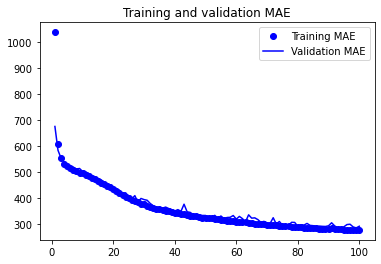

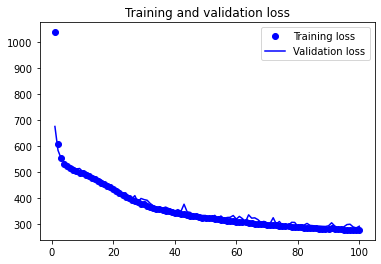

In [118]:
 mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 7

In [119]:
# Set random seed
tf.random.set_seed(12)
# Replicate model_1 and add an extra layer
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(150,activation='relu'),
     tf.keras.layers.Dense(150,activation='relu'),
  tf.keras.layers.Dense(1)
])
# Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), ##Adam optimizer
                metrics=['mae'])
# Fit the model
history = model_7.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 100)

Epoch 1/100
1180/1180 [==============================] - 1s 1ms/step - loss: 954.2632 - mae: 954.2632 - val_loss: 636.1755 - val_mae: 636.1755
Epoch 2/100
1180/1180 [==============================] - 1s 1ms/step - loss: 573.5347 - mae: 573.5347 - val_loss: 553.3817 - val_mae: 553.3817
Epoch 3/100
1180/1180 [==============================] - 1s 1ms/step - loss: 529.9929 - mae: 529.9929 - val_loss: 531.5778 - val_mae: 531.5778
Epoch 4/100
1180/1180 [==============================] - 1s 1ms/step - loss: 514.5142 - mae: 514.5142 - val_loss: 538.7284 - val_mae: 538.7284
Epoch 5/100
1180/1180 [==============================] - 1s 1ms/step - loss: 505.9496 - mae: 505.9496 - val_loss: 523.3909 - val_mae: 523.3909
Epoch 6/100
1180/1180 [==============================] - 1s 1ms/step - loss: 496.8520 - mae: 496.8520 - val_loss: 509.1940 - val_mae: 509.1940
Epoch 7/100
1180/1180 [==============================] - 1s 980us/step - loss: 485.5362 - mae: 485.5362 - val_loss: 492.3108 - val_mae: 492.31

Epoch 58/100
1180/1180 [==============================] - 3s 2ms/step - loss: 307.6592 - mae: 307.6592 - val_loss: 325.9159 - val_mae: 325.9159
Epoch 59/100
1180/1180 [==============================] - 1s 1ms/step - loss: 303.3672 - mae: 303.3672 - val_loss: 327.8127 - val_mae: 327.8127
Epoch 60/100
1180/1180 [==============================] - 2s 2ms/step - loss: 301.8250 - mae: 301.8250 - val_loss: 309.9076 - val_mae: 309.9076
Epoch 61/100
1180/1180 [==============================] - 2s 2ms/step - loss: 299.5882 - mae: 299.5882 - val_loss: 309.9508 - val_mae: 309.9508
Epoch 62/100
1180/1180 [==============================] - 2s 2ms/step - loss: 299.5450 - mae: 299.5450 - val_loss: 304.8741 - val_mae: 304.8741
Epoch 63/100
1180/1180 [==============================] - 2s 1ms/step - loss: 298.8336 - mae: 298.8336 - val_loss: 300.7208 - val_mae: 300.7208
Epoch 64/100
1180/1180 [==============================] - 2s 2ms/step - loss: 294.0214 - mae: 294.0214 - val_loss: 342.7528 - val_mae: 3

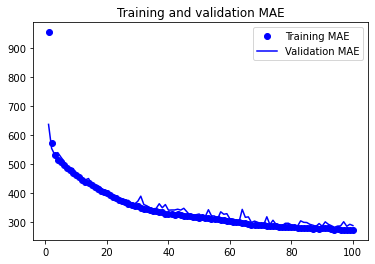

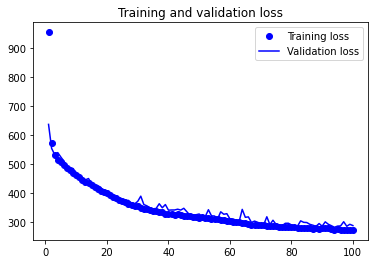

In [120]:
 mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 8

In [121]:
# Set random seed
tf.random.set_seed(12)

# Replicate model_1 and add an extra layer
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
     tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1)
])
# Compile the model
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), ##Adam optimizer
                metrics=['mae'])

# Fit the model
history = model_8.fit( X_train, y_train,batch_size = 32,validation_data= (valX, valY), epochs = 100)

Epoch 1/100
1180/1180 [==============================] - 2s 1ms/step - loss: 1315.6251 - mae: 1315.6251 - val_loss: 706.6008 - val_mae: 706.6008
Epoch 2/100
1180/1180 [==============================] - 1s 1ms/step - loss: 661.6995 - mae: 661.6995 - val_loss: 636.6702 - val_mae: 636.6702
Epoch 3/100
1180/1180 [==============================] - 2s 1ms/step - loss: 597.3706 - mae: 597.3706 - val_loss: 588.3575 - val_mae: 588.3575
Epoch 4/100
1180/1180 [==============================] - 2s 1ms/step - loss: 557.6378 - mae: 557.6378 - val_loss: 556.9036 - val_mae: 556.9036
Epoch 5/100
1180/1180 [==============================] - 1s 1ms/step - loss: 539.4428 - mae: 539.4428 - val_loss: 542.0651 - val_mae: 542.0651
Epoch 6/100
1180/1180 [==============================] - 1s 1ms/step - loss: 528.2980 - mae: 528.2980 - val_loss: 533.9553 - val_mae: 533.9553
Epoch 7/100
1180/1180 [==============================] - 1s 1ms/step - loss: 521.0422 - mae: 521.0422 - val_loss: 533.9999 - val_mae: 533.99

1180/1180 [==============================] - 1s 915us/step - loss: 345.3962 - mae: 345.3962 - val_loss: 368.9024 - val_mae: 368.9024
Epoch 58/100
1180/1180 [==============================] - 1s 1ms/step - loss: 344.2051 - mae: 344.2051 - val_loss: 349.6819 - val_mae: 349.6819
Epoch 59/100
1180/1180 [==============================] - 1s 1ms/step - loss: 342.0614 - mae: 342.0614 - val_loss: 357.7525 - val_mae: 357.7525
Epoch 60/100
1180/1180 [==============================] - 1s 1ms/step - loss: 342.9451 - mae: 342.9451 - val_loss: 354.5040 - val_mae: 354.5040
Epoch 61/100
1180/1180 [==============================] - 1s 1ms/step - loss: 341.7972 - mae: 341.7972 - val_loss: 350.3504 - val_mae: 350.3504
Epoch 62/100
1180/1180 [==============================] - 1s 976us/step - loss: 340.8585 - mae: 340.8585 - val_loss: 351.1568 - val_mae: 351.1568
Epoch 63/100
1180/1180 [==============================] - 1s 979us/step - loss: 338.8566 - mae: 338.8566 - val_loss: 347.1184 - val_mae: 347.1184

### Prediction

In [123]:
preds = model_7.predict(X_test)

In [124]:
def plot_preds(traindata = X_train[:,0],
               trainlabels = y_train,
               testdata = X_test[:,0],
               testlabels = y_test,
               predictions = preds):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()

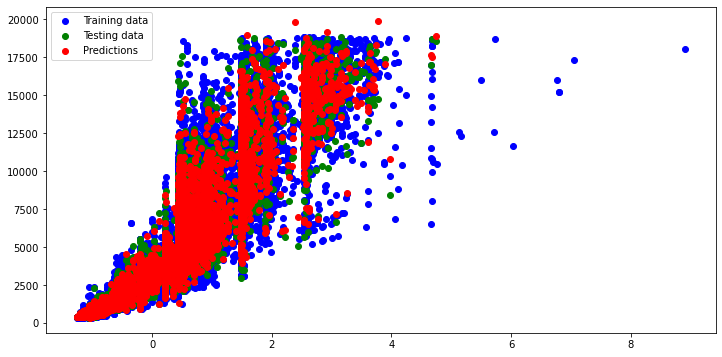

In [125]:
plot_preds(traindata = X_train[:,0],

           trainlabels = y_train,

           testdata = X_test[:,0],

           testlabels = y_test,

           predictions = preds)

## Comparing Actual VS Predicted Values

In [132]:
def plot_preds(testdata = X_test[:,0],
               testlabels = y_test,
               predictions = preds):
  plt.figure(figsize=(12,6))
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()

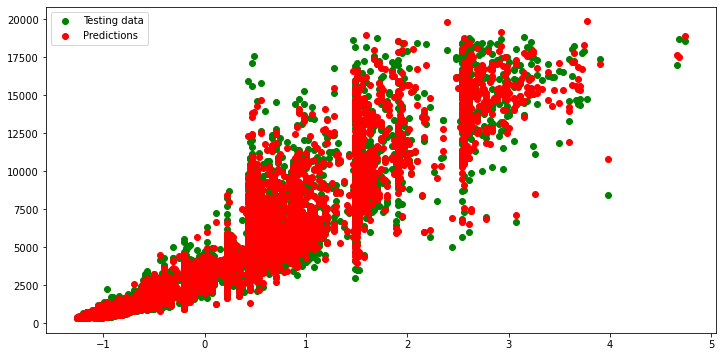

In [133]:
plot_preds(testdata = X_test[:,0],

           testlabels = y_test,

           predictions = preds)

### Predicting the results of the Test set

In [126]:
y_pred = model_7.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2634.07  2871.  ]
 [10820.22 12406.  ]
 [ 6546.04  6683.  ]
 ...
 [  926.22   955.  ]
 [ 5265.13  4719.  ]
 [ 2336.61  2371.  ]]
